In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pickle
import os

path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsauswertung\EBZ NHTS\Werktag\Auswertungsergebnisse\NHTS_Trips_Werktag_CS1_Ladezeiten.pickle"
df = pickle.load(open(path, 'rb'))

In [5]:
df.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,300000071,1,1,4,600,40,615,15,8.439,295,100.0,95.9,NaN,NaN
1,300000071,2,4,1,910,61,930,20,8.286,1110,95.9,91.9,930.0,983.0
2,300000072,1,2,1,420,28,540,120,135.191,540,100.0,52.0,540.0,818.0
3,300000072,2,1,2,1080,72,1230,150,131.367,630,100.0,53.4,NaN,NaN
4,300000073,1,1,2,525,35,540,15,3.621,330,100.0,98.7,NaN,NaN


In [6]:
# Anzahl Fahrzeuge entspricht Anzahl der ersten Trips
no_cars = len(df[df["Trip_no"]==1])

## Filtern und Vorbereiten der Analyse

In [7]:
# Fahrten auf solche mit anschließendem Ladevorgang filtern
filt = df["Charge_start"].notnull()
df_filt = df[filt]

In [8]:
df_filt.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
1,300000071,2,4,1,910,61,930,20,8.286,1110,95.9,91.9,930.0,983.0
2,300000072,1,2,1,420,28,540,120,135.191,540,100.0,52.0,540.0,818.0
5,300000073,2,2,1,870,58,885,15,3.610,1080,98.7,97.4,885.0,900.0
7,300000081,2,2,1,1410,94,1420,10,12.902,695,94.7,89.4,1420.0,1468.0
11,300000121,4,4,1,485,32,495,10,1.632,45,96.9,96.5,495.0,538.0


In [9]:
# reduzierte Liste neu indizieren
df_filt.reset_index(drop=True, inplace=True)
df_filt.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,300000071,2,4,1,910,61,930,20,8.286,1110,95.9,91.9,930.0,983.0
1,300000072,1,2,1,420,28,540,120,135.191,540,100.0,52.0,540.0,818.0
2,300000073,2,2,1,870,58,885,15,3.610,1080,98.7,97.4,885.0,900.0
3,300000081,2,2,1,1410,94,1420,10,12.902,695,94.7,89.4,1420.0,1468.0
4,300000121,4,4,1,485,32,495,10,1.632,45,96.9,96.5,495.0,538.0


In [10]:
df_filt["Charge_end"] = df_filt["Charge_end"].apply(lambda x: x-1440 if x > 1440 else x)

C:\Users\thoma\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_filt.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,300000071,2,4,1,910,61,930,20,8.286,1110,95.9,91.9,930.0,983.0
1,300000072,1,2,1,420,28,540,120,135.191,540,100.0,52.0,540.0,818.0
2,300000073,2,2,1,870,58,885,15,3.610,1080,98.7,97.4,885.0,900.0
3,300000081,2,2,1,1410,94,1420,10,12.902,695,94.7,89.4,1420.0,28.0
4,300000121,4,4,1,485,32,495,10,1.632,45,96.9,96.5,495.0,538.0


In [12]:
df_filt.describe()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
count,1.648690e+05,164869.000000,164869.000000,164869.0,164869.000000,164869.000000,164869.000000,164869.000000,164869.000000,164869.000000,164869.000000,164869.000000,164869.000000,164869.000000
mean,3.494046e+08,4.155572,3.213090,1.0,929.087178,61.929435,945.924152,21.175042,15.242931,697.000376,87.126392,80.523551,945.924152,940.742420
std,5.046745e+07,2.394782,1.043919,0.0,240.278004,16.021110,245.810443,28.319311,42.126209,434.808287,51.169582,58.152939,245.810443,325.203758
min,3.000001e+08,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,-9.000000,-1.000000,16.000000,-12873.200000,-12874.900000,0.000000,1.000000
25%,3.025707e+08,2.000000,2.000000,1.0,770.000000,51.000000,788.000000,10.000000,3.077000,230.000000,86.600000,78.800000,788.000000,763.000000
50%,3.051602e+08,4.000000,3.000000,1.0,960.000000,64.000000,990.000000,15.000000,7.002000,775.000000,94.600000,90.600000,990.000000,1015.000000
75%,4.035845e+08,5.000000,4.000000,1.0,1090.000000,73.000000,1110.000000,25.000000,16.280000,1020.000000,98.100000,96.100000,1110.000000,1173.000000
max,4.079430e+08,50.000000,5.000000,1.0,1439.000000,96.000000,1439.000000,990.000000,4703.832000,1439.000000,106.200000,100.000000,1439.000000,1440.000000


## Ermitteln der Anzahl ladender Fahrzeuge über Zeitverlauf

In [13]:
# erhöhen des cars_charging Zähler um 1 für jeden Ladevorgang zwischen Charge_start und Charge_end
def calc_cars_charging(df_filt):
    # initialisieren Liste 
    cars_charging = [0 for i in range(1441)]
    for i in range(len(df_filt)):
        if df_filt.at[i, "Charge_start"] < df_filt.at[i, "Charge_end"]:
            for j in range(int(df_filt.at[i, "Charge_start"]), int(df_filt.at[i, "Charge_end"]) + 1):
                cars_charging[j] += 1
        else: 
            for j in range(int(df_filt.at[i, "Charge_start"]), 1441):
                cars_charging[j] += 1
            for j in range(0, int(df_filt.at[i, "Charge_end"])):
                cars_charging[j] += 1
    return cars_charging

In [16]:
cars_charging_total = calc_cars_charging(df_filt)
# normieren des Ergebnis auf Anzahl simulierter Fahrzeuge
# ACHTUNG: Wert anpassen, bei Anpassung der Simulation (Globalvariable in Ergebnis speichern und hier über Variable definieren?)
cars_charging_total = [x/no_cars for x in cars_charging_total]

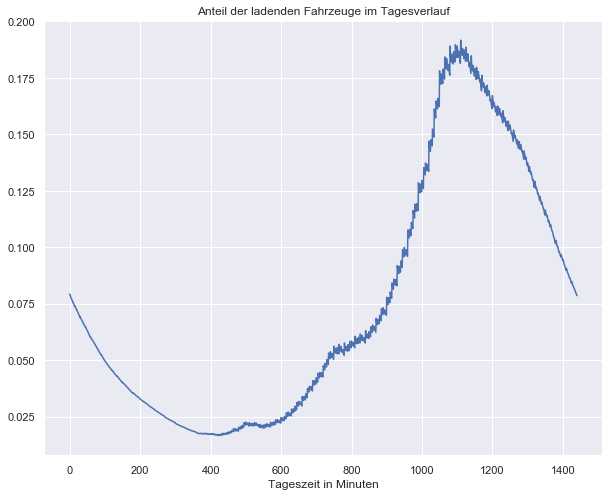

In [17]:
# Visualisieren
sns.set()
plt.figure(figsize=(10,8))
x = np.linspace(0, 1440, 1441)
plt.title("Anteil der ladenden Fahrzeuge im Tagesverlauf")
plt.xlabel("Tageszeit in Minuten")
plt.plot(x, cars_charging_total);

In [19]:
import pickle

path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsauswertung\EBZ NHTS\Werktag\Auswertungsergebnisse\Ladende_Fahrzeuge_CS1.pickle"

pickle.dump(cars_charging_total, open(path, "wb"))